In [9]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in original data:
df_train = pd.read_csv("../Data/train.csv", encoding='utf-8')
df_test = pd.read_csv("../Data/test.csv", encoding='utf-8')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


#### Graph of Null Values in Data for Train and Test:

In [7]:
xTrain = df_train[['keyword', 'location', 'text']].isnull().sum().index
xTest = df_test[['keyword', 'location', 'text']].isnull().sum().index
yTrain = df_train[['keyword', 'location', 'text']].isnull().sum().values
yTest = df_test[['keyword', 'location', 'text']].isnull().sum().values

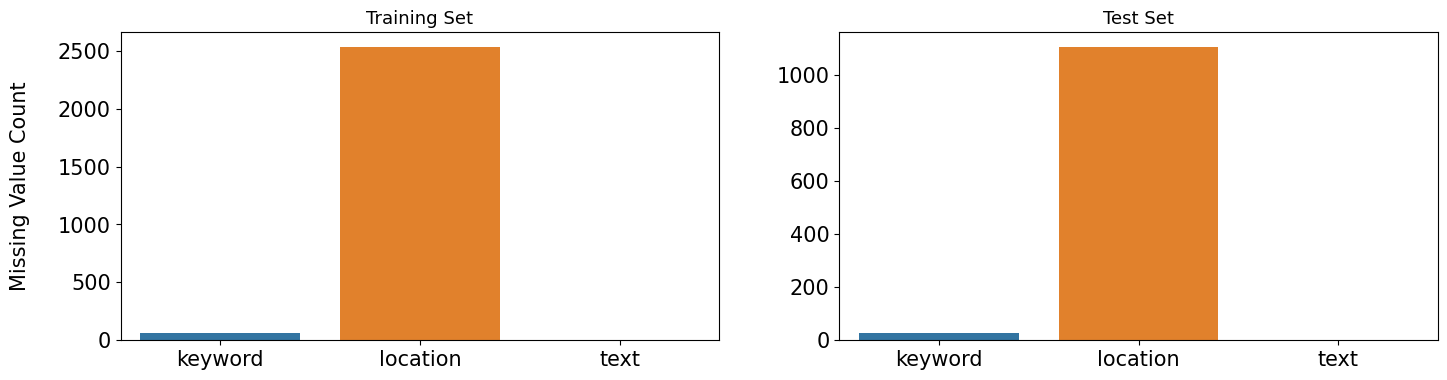

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=xTrain, y=yTrain, ax=axes[0])
sns.barplot(x=xTest, y=yTest, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

#### Finding Number of Unique Values:

In [11]:
print(f'Number of unique values in keyword = {df_train["keyword"].nunique()}/{len(df_train)} in Training and {df_test["keyword"].nunique()}/{len(df_test)} in Test')
print(f'Number of unique values in location = {df_train["location"].nunique()}/{len(df_train)} in Training and {df_test["location"].nunique()}/{len(df_test)} in Test')

Number of unique values in keyword = 221/7613 in Training and 221/3263 in Test
Number of unique values in location = 3341/7613 in Training and 1602/3263 in Test


#### Graph of Keyword Counts:

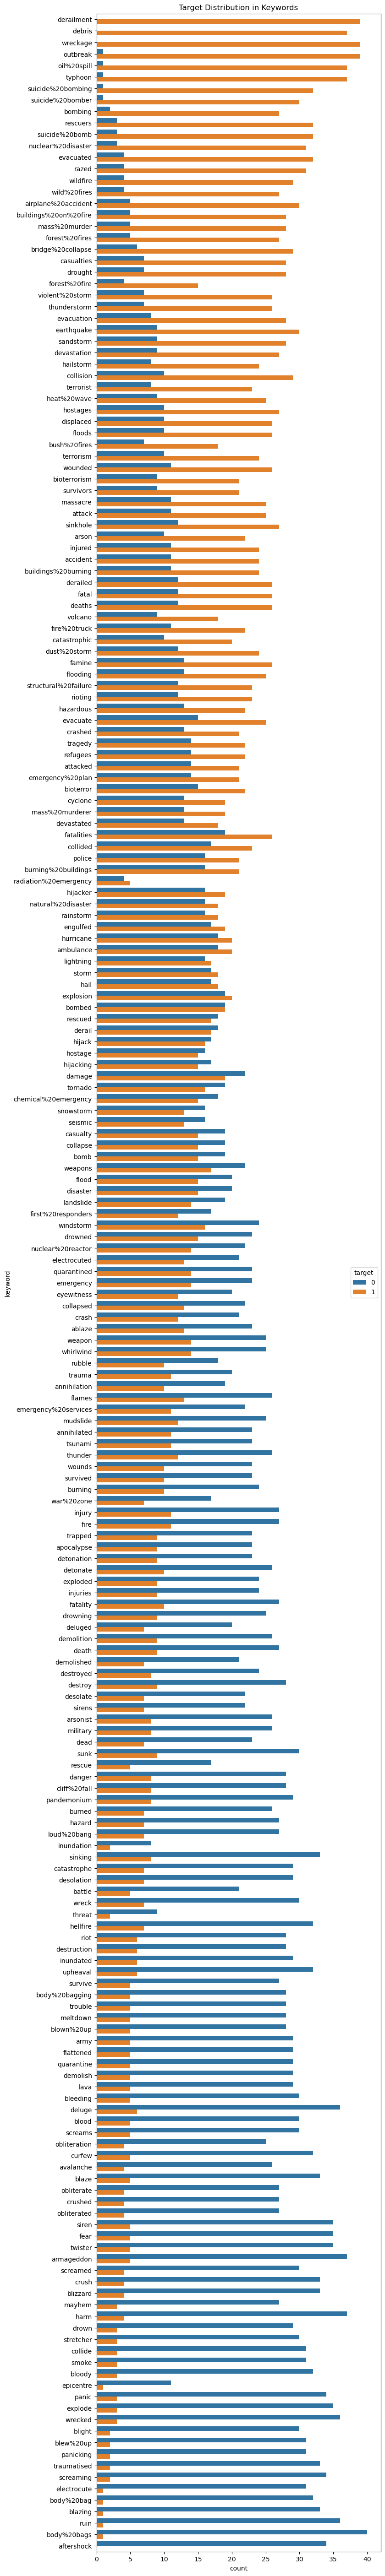

In [12]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)
sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])
plt.title('Target Distribution in Keywords')
plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

#### Graph of Target Distribution:

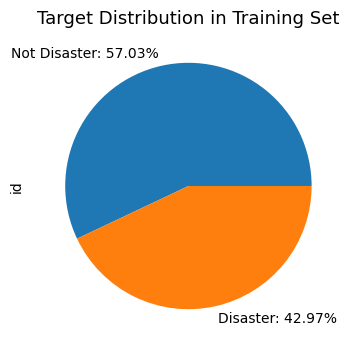

In [13]:
fig = plt.figure(figsize=(17, 4), dpi=100)
df_train.groupby('target').count()['id'].plot(kind='pie', labels=['Not Disaster: ' + str(round(100*df_train['target'].value_counts()[0]/len(df_train),2)) + '%', 'Disaster: ' + str(round(100*df_train['target'].value_counts()[1]/len(df_train),2)) + '%'])
plt.title('Target Distribution in Training Set', fontsize=13)
plt.show()